In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

Download this file: https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/temperature/decav/1.00/woa18_decav_t01_01.nc

This is the temperature during January from the World Ocean Atlas available at: https://www.ncei.noaa.gov/access/world-ocean-atlas-2018/

In [3]:
!wget https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/temperature/decav/1.00/woa18_decav_t01_01.nc

--2023-08-25 16:52:40--  https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/temperature/decav/1.00/woa18_decav_t01_01.nc
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.177, 205.167.25.171, 205.167.25.168, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.177|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 118230074 (113M) [application/x-netcdf]
Saving to: ‘woa18_decav_t01_01.nc’

woa18_decav_t01_01. 100%[===================>] 112.75M  10.3MB/s    in 12s     

2023-08-25 16:52:53 (9.34 MB/s) - ‘woa18_decav_t01_01.nc’ saved [118230074/118230074]



In [2]:
woaT = xr.open_dataset("./woa18_decav_t01_01.nc", decode_times=False)

In [3]:
woaT

<xarray.Dataset>
Dimensions:             (depth: 57, lat: 180, lon: 360, nbounds: 2, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 1400.0 1450.0 1500.0
  * time                (time) float32 372.5
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    t_an                (time, depth, lat, lon) float32 ...
    t_mn                (time, depth, lat, lon) float32 ...
    t_dd                (time, depth, lat, lon) float64 ...
    t_sd                (time, depth, lat, lon) float32 ...
    t_se                (time, depth, lat, lon) float32 ...
    t_oa                (time, depth, lat, lon) float32 ...
    t_ma                (time, depth, lat, lon) float32 ...
    t_gp                (time, depth, lat, lon) float64 ...
Attributes:
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    id:                              woa18_decav_t01_01.nc
    naming_authority:                gov.noaa.ncei
    sea_name:                        World-Wide Distribution
    time_coverage_start:             1955-01-01
    time_coverage_end:               2017-01-31
    time_coverage_duration:          P63Y
    time_coverage_resolution:        P01M
    geospatial_lat_min:              -90.0
    geospatial_lat_max:              90.0
    geospatial_lon_min:              -180.0
    geospatial_lon_max:              180.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         1500.0
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       1.00 degrees
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       1.00 degrees
    geospatial_vertical_units:       m
    geospatial_vertical_resolution:  SPECIAL
    geospatial_vertical_positive:    down
    creator_name:                    Ocean Climate Laboratory
    creator_email:                   NCEI.info@noaa.gov
    creator_url:                     http://www.ncei.noaa.gov
    creator_type:                    group
    creator_institution:             National Centers for Environmental Infor...
    project:                         World Ocean Atlas Project
    processing_level:                processed
    keywords:                        Oceans< Ocean Temperature > Water Temper...
    keywords_vocabulary:             ISO 19115
    standard_name_vocabulary:        CF Standard Name Table v49
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    cdm_data_type:                   Grid
    publisher_name:                  National Centers for Environmental Infor...
    publisher_institution:           National Centers for Environmental Infor...
    publisher_type:                  institution
    publisher_url:                   http://www.ncei.noaa.gov/
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-28 
    date_modified:                   2019-07-28

In [7]:
woaT["t_mn"].long_name

'Average of all unflagged interpolated values at each standard depth level for sea_water_temperature in each grid-square which contain at least one measurement.'

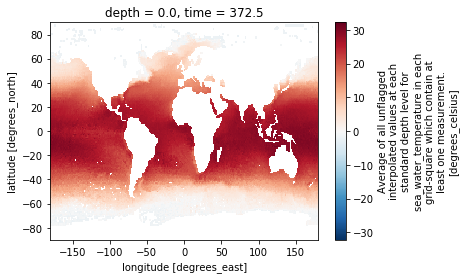

In [8]:
woaT.t_mn.isel(time =0, depth=0).plot()

In [24]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np

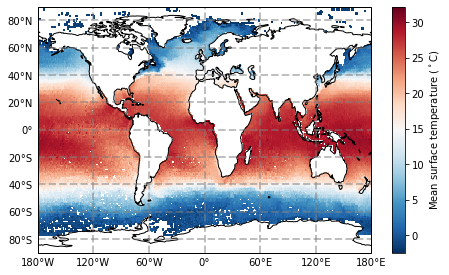

In [30]:
plt.figure(figsize = (190/25.4, 0.5*230/25.4))
mapax = plt.subplot(projection = ccrs.PlateCarree())

CF = mapax.pcolormesh(woaT.lon, woaT.lat, woaT.t_mn.isel(time =0, depth=0), cmap="RdBu_r")

mapax.coastlines()
mapax.set_aspect("auto")


gl = mapax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 60))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


cbar = plt.colorbar(CF, ax=mapax)
cbar.set_label("Mean surface temperature ($^\circ$C)")

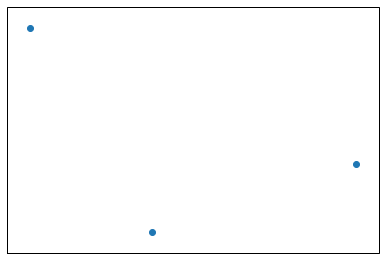

In [32]:
lats = [58.333, 58.5, 58.25]
lons = [11.9, 11.5, 11.65]

plt.figure(figsize = (190/25.4, 0.5*230/25.4))
mapax = plt.subplot(projection = ccrs.PlateCarree())

mapax.scatter(lons, lats)
mapax.coastlines()